<a href="https://colab.research.google.com/github/bathl01/deep_learning_challenge_21/blob/main/AlphabetSoupCharity_Model1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
display(application_df.head())
display(application_df.tail())

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
34294,996009318,THE LIONS CLUB OF HONOLULU KAMEHAMEHA,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,996010315,INTERNATIONAL ASSOCIATION OF LIONS CLUBS,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,996012607,PTA HAWAII CONGRESS,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,996015768,AMERICAN FEDERATION OF GOVERNMENT EMPLOYEES LO...,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1
34298,996086871,WATERHOUSE CHARITABLE TR,T3,Independent,C1000,Preservation,Co-operative,1,1M-5M,N,36500179,0


What variable(s) are the target(s) for your model?  
What variable(s) are the feature(s) for your model?

In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(columns=["EIN", "NAME"])
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
type_cnt = application_df['APPLICATION_TYPE'].value_counts()
type_cnt

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [5]:
# Choose a cutoff value and create a list of application types to be replaced
replace_list = list(type_cnt.iloc[9:].index)
replace_list

['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17']

In [6]:
# use the variable name `application_types_to_replace`
application_types_to_replace = list(type_cnt.iloc[9:].index)
cutoff_value_type = 156

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other_type")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3            27037
T4             1542
T6             1216
T5             1173
T19            1065
T8              737
T7              725
T10             528
T9              156
Other_type      120
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_values = application_df['CLASSIFICATION'].value_counts()
class_values

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [8]:
# You may find it helpful to look at CLASSIFICATION value counts >1
class_cnts_gt1 = class_values.loc[class_values > 1]
class_cnts_gt1

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: CLASSIFICATION, dtype: int64

In [9]:
# Choose a cutoff value and create a list of classifications to be replaced
replace_class = list(class_values.iloc[11:].index)
replace_class
class_values.iloc[11:].index

Index(['C2800', 'C7100', 'C1300', 'C1280', 'C1230', 'C1400', 'C7200', 'C2300',
       'C1240', 'C8000', 'C7120', 'C1500', 'C1800', 'C6000', 'C1250', 'C8200',
       'C1238', 'C1278', 'C1235', 'C1237', 'C7210', 'C2400', 'C1720', 'C4100',
       'C1257', 'C1600', 'C1260', 'C2710', 'C0', 'C3200', 'C1234', 'C1246',
       'C1267', 'C1256', 'C2190', 'C4200', 'C2600', 'C5200', 'C1370', 'C1248',
       'C6100', 'C1820', 'C1900', 'C1236', 'C3700', 'C2570', 'C1580', 'C1245',
       'C2500', 'C1570', 'C1283', 'C2380', 'C1732', 'C1728', 'C2170', 'C4120',
       'C8210', 'C2561', 'C4500', 'C2150'],
      dtype='object')

In [10]:
# use the variable name `classifications_to_replace`
classifications_to_replace = list(class_values.iloc[11:].index)
cutoff_value_class = 104

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other_class")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000          17326
C2000           6074
C1200           4837
C3000           1918
C2100           1883
C7000            777
Other_class      669
C1700            287
C4000            194
C5000            116
C1270            114
C2700            104
Name: CLASSIFICATION, dtype: int64

In [11]:
# identify column types
application_df.dtypes

APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [12]:
# Convert categorical data to numeric with `pd.get_dummies`
cat_data_num_df = pd.get_dummies(application_df)
display(cat_data_num_df.head())
display(cat_data_num_df.tail())

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other_type,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other_type,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
34294,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34295,1,5000,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
34296,1,5000,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34297,1,5000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
34298,1,36500179,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
# Split our preprocessed data into our features and target arrays
y = cat_data_num_df["IS_SUCCESSFUL"]
X = cat_data_num_df.drop(["IS_SUCCESSFUL"],axis=1)

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model
### Attempt 1
APPLICATION_TYPE cutoff = 156  
CLASSIFICATION cutoff = 104  
layer1 = 9 : activation function = relu  
layer2 = 18 : activation function = relu

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
number_input_features

50

In [16]:
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 20

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                510       
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 751 (2.93 KB)
Trainable params: 751 (2.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [18]:
# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 5s 4ms/step - loss: 0.5867 - accuracy: 0.7128
Epoch 2/50
804/804 [==============================] - 3s 4ms/step - loss: 0.5607 - accuracy: 0.7233
Epoch 3/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5556 - accuracy: 0.7253
Epoch 4/50
804/804 [==============================] - 2s 3ms/step - loss: 0.5533 - accuracy: 0.7273
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5517 - accuracy: 0.7282
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5503 - accuracy: 0.7300
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5492 - accuracy: 0.7294
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.5488 - accuracy: 0.7297
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5480 - accuracy: 0.7306
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5476 - accuracy: 0.7293

In [19]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5471 - accuracy: 0.7306 - 319ms/epoch - 1ms/step
Loss: 0.5470668077468872, Accuracy: 0.7306122183799744


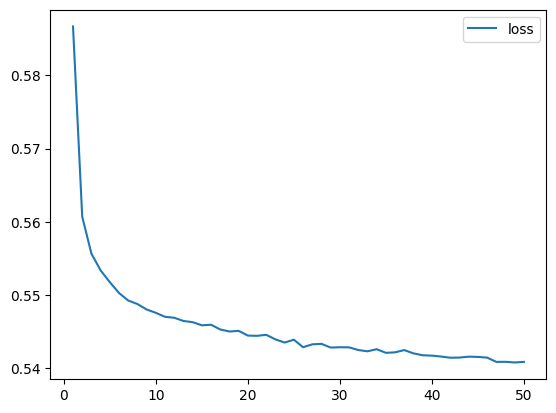

In [20]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")
plt.show()


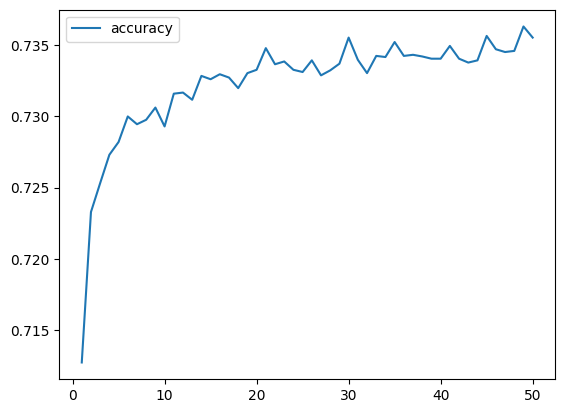

In [21]:
# Plot the accuracy
history_df.plot(y="accuracy")
plt.show()

In [22]:
# Export our model to HDF5 file
# Define the filename
filename = 'C:/Users/Laura/Desktop/Boot_Camp/deep_learning_challenge_21/H5_files/AlphabetSoupCharity_model1.h5'


# Save the model to a HDF5 file
nn.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Attempt 2 - Added a third hidden layer and change the Activation Function
APPLICATION_TYPE cutoff = 156  
CLASSIFICATION cutoff = 104  
layer1 = 9 : activation function = relu  
layer2 = 18 : activation function = sigmoid  
layer3 = 27 : activation function = sigmoid

epoch increased from 50 to 100

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 10
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 30


nn2 = tf.keras.models.Sequential()

# First hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Third hidden layer
nn2.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                510       
                                                                 
 dense_4 (Dense)             (None, 20)                220       
                                                                 
 dense_5 (Dense)             (None, 30)                630       
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 1391 (5.43 KB)
Trainable params: 1391 (5.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
# Compile the model
nn2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [25]:
# Train the model
fit_model2 = nn2.fit(X_train_scaled, y_train, epochs=50)

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.6004 - accuracy: 0.6995
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5628 - accuracy: 0.7285
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5583 - accuracy: 0.7293
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5560 - accuracy: 0.7304
Epoch 5/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5540 - accuracy: 0.7306
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5524 - accuracy: 0.7305
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5516 - accuracy: 0.7320
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5508 - accuracy: 0.7305
Epoch 9/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5500 - accuracy: 0.7312
Epoch 10/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5491 - accuracy: 0.7315

In [26]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5490 - accuracy: 0.7332 - 296ms/epoch - 1ms/step
Loss: 0.5490245819091797, Accuracy: 0.7331778407096863


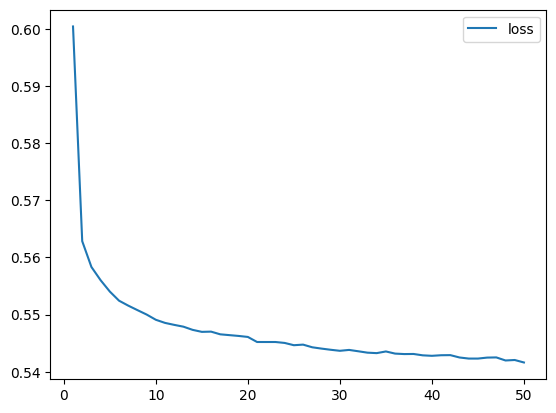

In [27]:
# Create a DataFrame containing training history
history2_df = pd.DataFrame(fit_model2.history)

# Increase the index by 1 to match the number of epochs
history2_df.index += 1

# Plot the loss
history2_df.plot(y="loss")
plt.show()


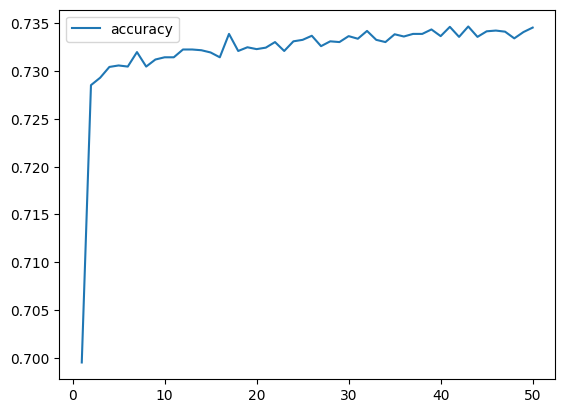

In [28]:
# Plot the accuracy
history2_df.plot(y="accuracy")
plt.show()

In [29]:
# Export our model to HDF5 file
# Define the filename
filename = 'C:/Users/Laura/Desktop/Boot_Camp/deep_learning_challenge_21/H5_files/AlphabetSoupCharity_Model2.h5'


# Save the model to a HDF5 file
nn2.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
